    В этой части буду проверять гипотезы из EDA_start, которые были выдвинуты в корреляционном анализе

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy.stats import mannwhitneyu, shapiro


 1. Между факторами Partner и Promo_friend (0.45) наблюдается положительная корреляция, что можно интерпритировать как

Клиенты, пригласившие людей по партнёрской программе, с высокой вероятностью являются партнерами. Это может влиять на фактор оттока (Churn).

    2. Между факторами Partner и Contact_period наблюдается положительная корреляция (0.31) , что можно интерпритировать как:

Клиенты, участвующие в партнёрской программе (Partner = 1), имеют большую вероятность заключать контракты на более долгосрочные периоды.

    3. Между факторами Partner и Mouth_to_end_contract наблюдается положительная связь (0.29), это указывает на:

Клиенты, использующие партнёрскую программу, чаще приобретают абонементы на более длительный срок.

    4. Связь между фактором Promo_friend и Contact_period, Mouth_to_end_contract также подтверждают предположения в пунктах 2,3.

    5. Между факторами Contact_period и Mouth_to_end_contract (0.97) высокая положительная связь, что эти факторы несут схожую информацию. Возможно, имеет смысл рассмотреть удаление одного из них.

    6. Между факторами Avg_class_frequency_current_month и Avg_class_frequency_total  (0.95) высокая положительная связь, что также может указывать на избыточную информацию. Возможно, стоит удалить один из этих факторов.

    7. Между факторами Churn и Contract_period, Age, Month_to_end_contract, Lifetime, Avg_class_frequency_current_month наблюдается умеренная отрицательная корреляция, что указывает на отрицательное влияние этих факторов на отток клиентов. В дальнейшем исследовании будет проверено, как эти факторы влияют на отток.

    8. Между факторами Churn и Near_Location, Partner, Promo_friends, Group_visits,Avg_additional_charges_total наблюдается слабая корреляция (менее 0.3), что указывает на незначительное влияние этих факторов на оттко клиетов. В дальнейшем в исследование эти факторы не будут проверятся, с целью концентрации на более влиятельных факторах.

1. gender – Пол клиента (0-муж, 1-жен)
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [25]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


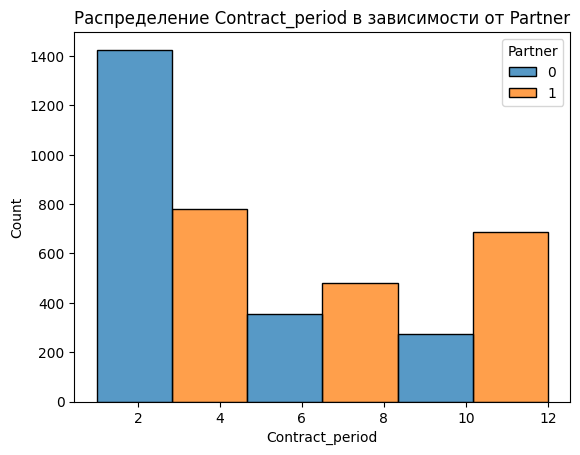

In [26]:
sns.histplot(df, x="Contract_period", hue="Partner", multiple="dodge", bins=3)
plt.title("Распределение Contract_period в зависимости от Partner")
plt.show()

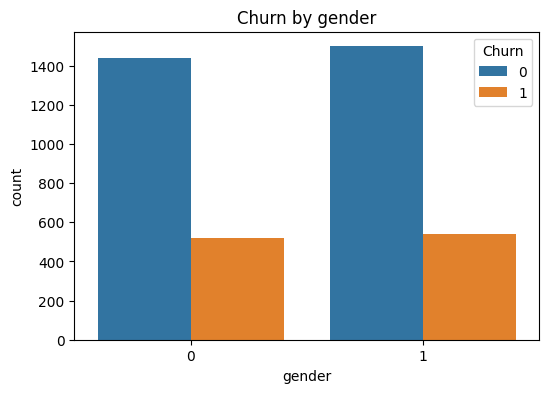

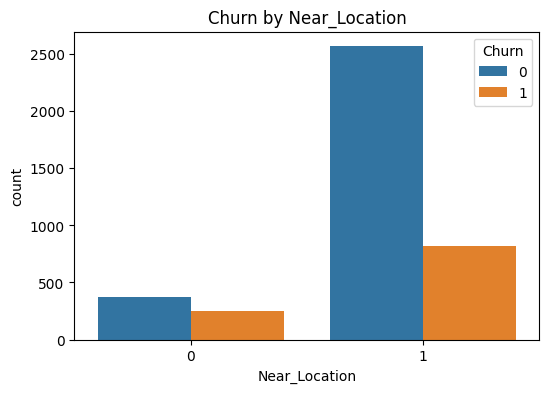

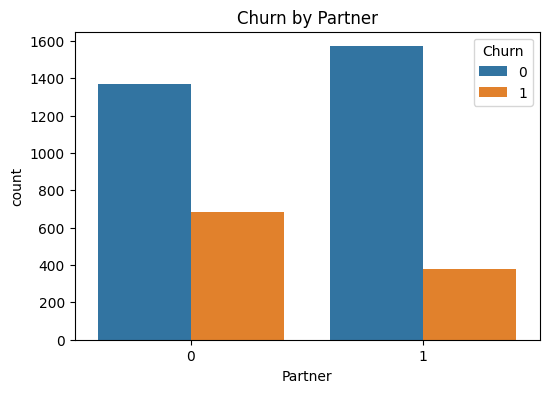

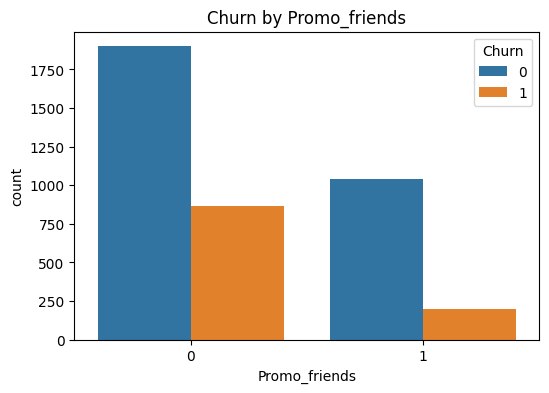

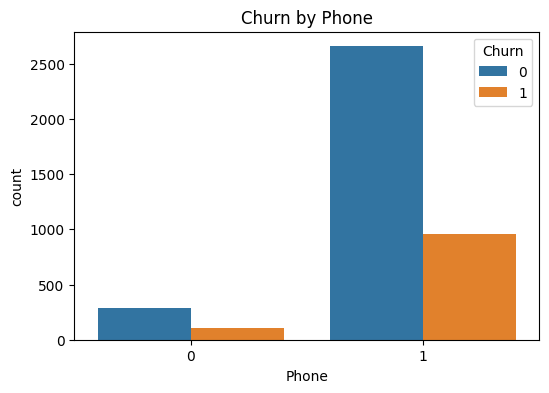

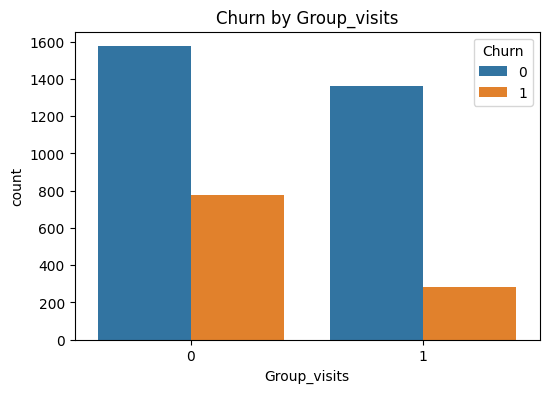

In [27]:
for col in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df['Churn'])
    plt.title(f'Churn by {col}')
    plt.show()


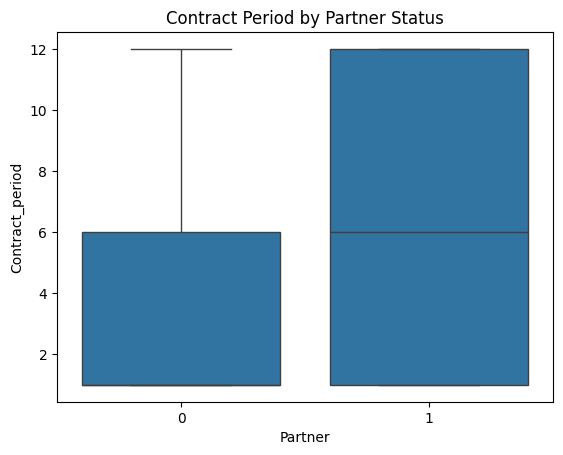

In [28]:
sns.boxplot(x=df['Partner'], y=df['Contract_period'])
plt.title("Contract Period by Partner Status")
plt.show()


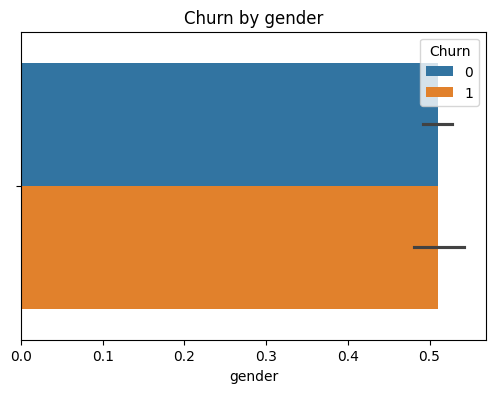

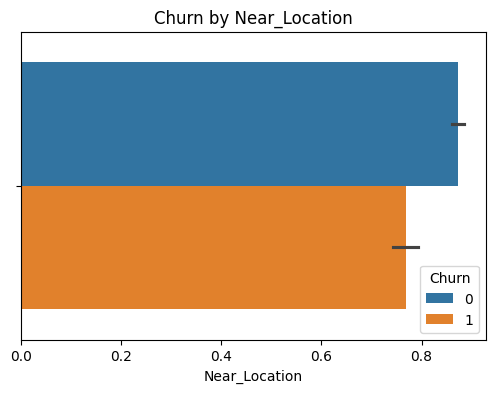

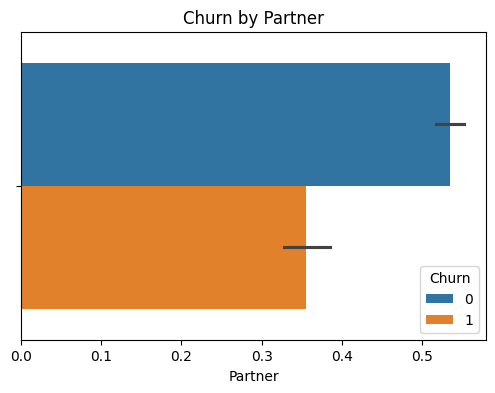

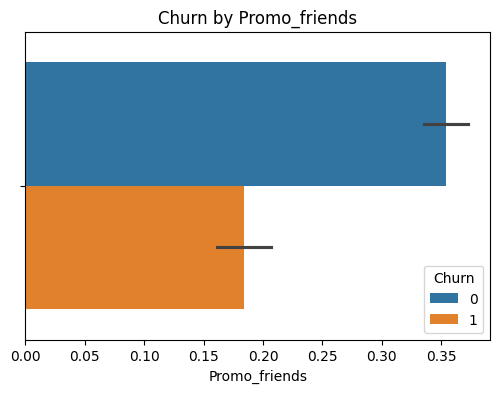

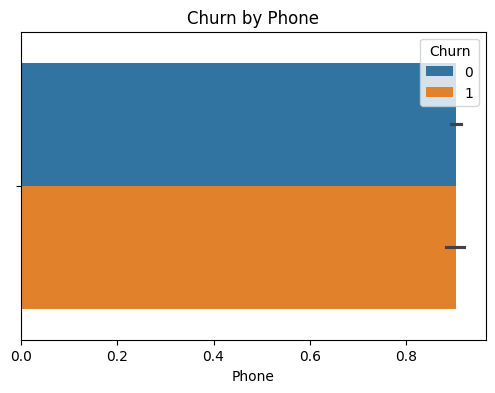

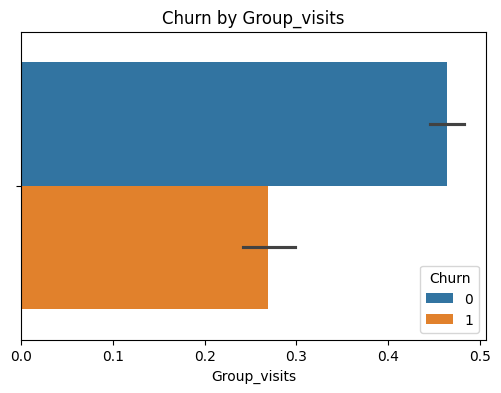

In [29]:
for col in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']:
    plt.figure(figsize=(6, 4))
    sns.barplot(x=df[col], hue=df['Churn'])
    plt.title(f'Churn by {col}')
    plt.show()


Проверка гипотезы о "Клиенты, участвующие в партнёрской программе (Partner = 1), имеют большую вероятность заключать контракты на более долгосрочные периоды."

H0: Клиенты, учавствующие в партнёрской программе (Partner = 1) не имеют большую вероятность заключать контракты на более долгосрочныве периоды по сравнению с клиентами, не учавствующими в программе (Partner = 0) 

H1: Клиенты, участвующие в партнёрской программе (Partner = 1), имеют большую вероятность заключать контракты на более долгосрочные периоды по сравнению с клиентами, не участвующими в программе (Partner = 0).

In [30]:
partner_0 = df[df['Partner'] == 0]['Contract_period']
partner_1 = df[df['Partner'] == 1]['Contract_period']

Сначала делаю проверку на нормальность распределения. Использую метод Shapiro-Uilka, спомощью библиотеки scipy. 

Доверительный интервал alpha = 0.05

In [47]:
shapiro_p0 = shapiro(partner_0).pvalue
shapiro_p1 = shapiro(partner_1).pvalue

print(f'shapiro_p0 = {shapiro_p0} \nshapiro_p1 = {shapiro_p1}')

shapiro_p0 = 1.9321534836596724e-55 
shapiro_p1 = 1.6171794417948866e-46


Оба p-value показали значения меньше заданной alpha. Распределение нельзя назвать нормальным, использовать t-test нельзя. Для проверки выбераем U-test Manna-Uitney.

In [ ]:
t_stat, p_value = mannwhitneyu(partner_0, partner_1, alternative="greater")

print(f't_stat = {t_stat} \np_value = {p_value}')

t_stat = 1355865.5 
p_value = 1.0


In [40]:
t_stat, p_value = mannwhitneyu(partner_0, partner_1, alternative="less")

print(f't_stat = {t_stat} \np_value = {p_value}')

t_stat = 1355865.5 
p_value = 1.3394275468069846e-85


In [41]:
t_stat, p_value = mannwhitneyu(partner_0, partner_1, alternative="two-sided")

print(f't_stat = {t_stat} \np_value = {p_value}')

t_stat = 1355865.5 
p_value = 2.678855093613969e-85


<Axes: xlabel='Partner', ylabel='Contract_period'>

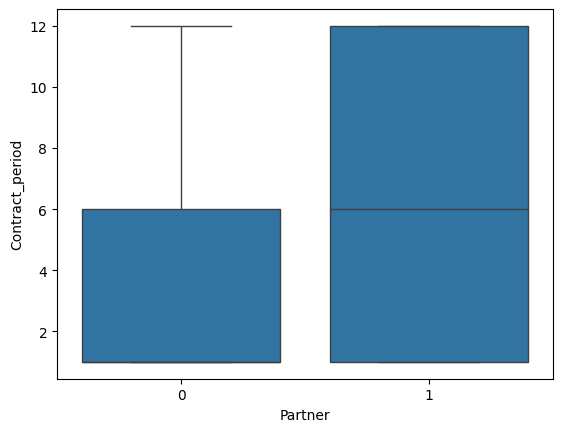

In [49]:
sns.boxplot(x="Partner", y="Contract_period", data=df)

In [35]:
df.groupby("Partner")["Contract_period"].median()

Partner
0    1.0
1    6.0
Name: Contract_period, dtype: float64

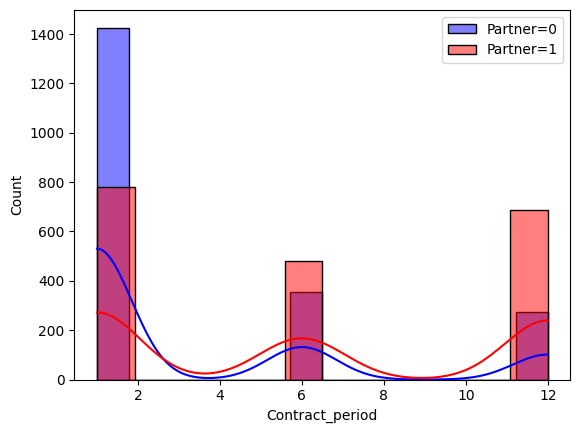

In [42]:
sns.histplot(partner_0, kde=True, color="blue", label="Partner=0", alpha=0.5)
sns.histplot(partner_1, kde=True, color="red", label="Partner=1", alpha=0.5)
plt.legend()
plt.show()

In [45]:
df.groupby("Partner")["Contract_period"].describe()


,count,mean,std,min,25%,50%,75%,max
Partner,,,,,,,,
0,2053.0,3.324890,3.873380,1.0,1.0,1.0,6.0,12.0
1,1947.0,6.111454,4.767612,1.0,1.0,6.0,12.0,12.0
